# Naive Bayes (Continous)

The idea of this project is to write a simple Naive Bayes model to predict Iris Species.

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Load the dataset

In [12]:
data = pd.read_csv('../datasets/iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:>

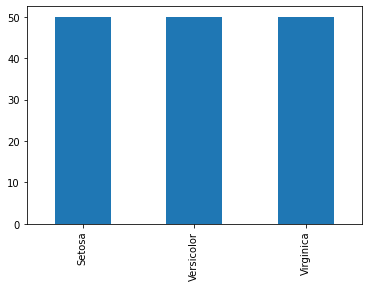

In [13]:
data['variety'].value_counts().plot(kind='bar')

## Preprocessing the dataset

In [ ]:
# replace class names with integer
variety={'Setosa':0, 'Versicolor':1, 'Virginica':2}
data.variety = [variety[item] for item in data.variety]

In [65]:
# divide the dataset
X = data[['sepal.length','sepal.width','petal.length','petal.width']]
y = data[['variety']]

# convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [71]:
class NB:
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.n_classes = len(np.unique(y))

        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)

        for c in range(self.n_classes):
            X_c = X[y == c]

            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.n_samples

    def predict(self, X):
        y_hat = [self.get_class_probability(x) for x in X]
        return np.array(y_hat)

    def get_class_probability(self, x):
        posteriors = list()

        for c in range(self.n_classes):
            mean = self.mean[c]
            variance = self.variance[c]
            prior = np.log(self.priors[c])

            posterior = np.sum(np.log(self.gaussian_density(x, mean, variance)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return np.argmax(posteriors)

    def gaussian_density(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        k = ((x - mean) ** 2 / var)
        proba = np.exp(-0.5 * k)

        return const * proba

In [72]:
nb = NB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

# helper function to calculate accuracy
def get_accuracy(y_true, y_hat):
    return np.sum(y_true == y_hat) / len(y_true)
  
# print results
print('Naive Bayes Accuracy: ', get_accuracy(y_test, predictions))

Naive Bayes Accuracy:  0.9777777777777777


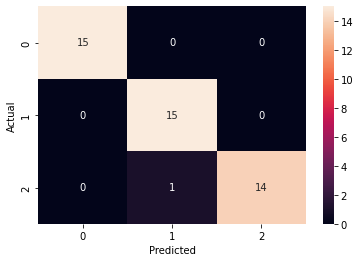

In [76]:
data_predictions = {'y_Actual':y_test,'y_Predicted': predictions}
df = pd.DataFrame(data_predictions, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [73]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Naive Bayes Accuracy: ', get_accuracy(y_test, predictions))

Naive Bayes Accuracy:  0.9777777777777777


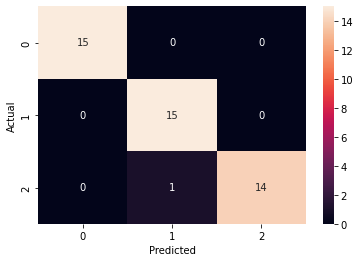

In [77]:
data_predictions = {'y_Actual':y_test,'y_Predicted': predictions}
df = pd.DataFrame(data_predictions, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()